# **Construção do DF**

In [19]:
import glob
import pandas as pd

data_folder = "../data/merged_data/"

df_enem = pd.DataFrame()
for file_name in glob.glob(data_folder+'*.csv'):
    x = pd.read_csv(file_name)
    x["ano"] = file_name[-8:-4]
    df_enem = pd.concat([df_enem,x],axis=0)

df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,numero_questao,enunciado,alternativas,nu_param_B,gabarito,ano
0,46,Os métodos empregados nas análises químicas \n...,A: ocorreu passagem de parte dos metais para u...,1.30943,A,2016
1,47,O paclitaxel é um triterpeno poli-hidroxilado ...,A: Divisão celular.; B: Transporte passivo.; C...,0.97925,A,2016
2,48,Para a instalação de um aparelho de ar-condici...,A: sugestão apresentada no texto minimiza o co...,0.38340,D,2016
3,50,Um jovem suspeita que não é filho biológico de...,A: o pai e a mãe sejam heterozigotos para o si...,0.98398,A,2016
4,51,Um cosmonauta russo estava a bordo da estação ...,"A: 0,10; B: 0,50; C: 2,1; D: 10; E: 21",1.61285,C,2016


# **Análise Exploratória**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = df_enem.rename(columns={"nu_param_B": "dificuldade"})
df.head()

,numero_questao,enunciado,alternativas,dificuldade,gabarito,ano
0,46,Os métodos empregados nas análises químicas \n...,A: ocorreu passagem de parte dos metais para u...,1.30943,A,2016
1,47,O paclitaxel é um triterpeno poli-hidroxilado ...,A: Divisão celular.; B: Transporte passivo.; C...,0.97925,A,2016
2,48,Para a instalação de um aparelho de ar-condici...,A: sugestão apresentada no texto minimiza o co...,0.38340,D,2016
3,50,Um jovem suspeita que não é filho biológico de...,A: o pai e a mãe sejam heterozigotos para o si...,0.98398,A,2016
4,51,Um cosmonauta russo estava a bordo da estação ...,"A: 0,10; B: 0,50; C: 2,1; D: 10; E: 21",1.61285,C,2016


## **Análise da Dificuldade**

Text(0, 0.5, 'Frequência')

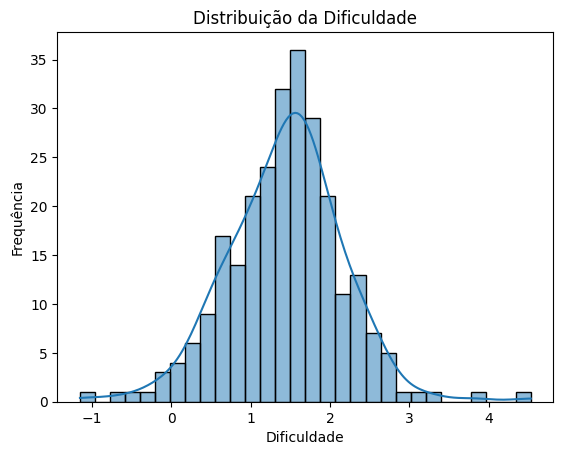

In [21]:
sns.histplot(df['dificuldade'], bins=30, kde=True)
plt.title('Distribuição da Dificuldade')
plt.xlabel('Dificuldade')
plt.ylabel('Frequência')

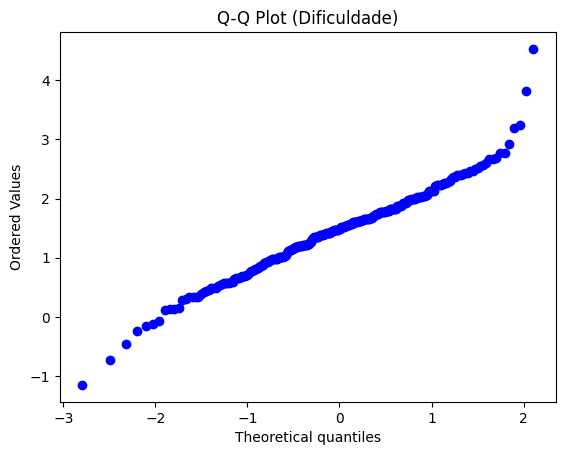

In [22]:
stats.probplot(df['dificuldade'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Dificuldade)')
plt.show()


In [40]:
stat, p = stats.shapiro(df[df['dificuldade'].notna()]['dificuldade'])
print(f"Estatística de teste: {stat:.4f} | p-valor: {p:.4f}")

if p > 0.05:
    print("Não rejeita H_0: distribuição normal.")
else:
    print("Rejeita H_0: exclui distribuição normal.")


Estatística de teste: 0.9844 | p-valor: 0.0060
Rejeita H_0: exclui distribuição normal.


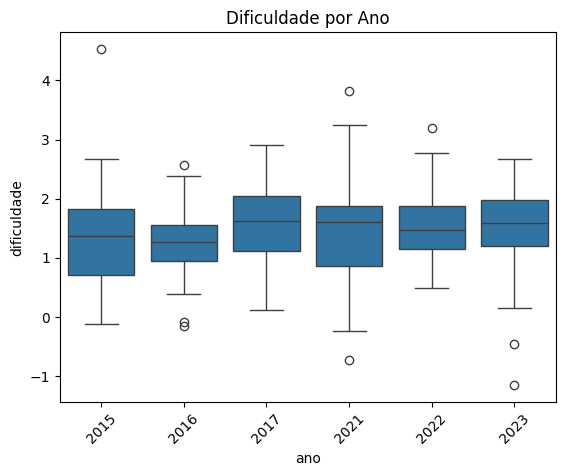

In [42]:
sns.boxplot(x='ano', y='dificuldade', data=df, order=sorted(df["ano"].unique()))
plt.title('Dificuldade por Ano')
plt.xticks(rotation=45)

plt.show()

## **Análise de Gabarito**

<Axes: title={'center': 'Distribuição de Alternativas Corretas'}, xlabel='gabarito'>

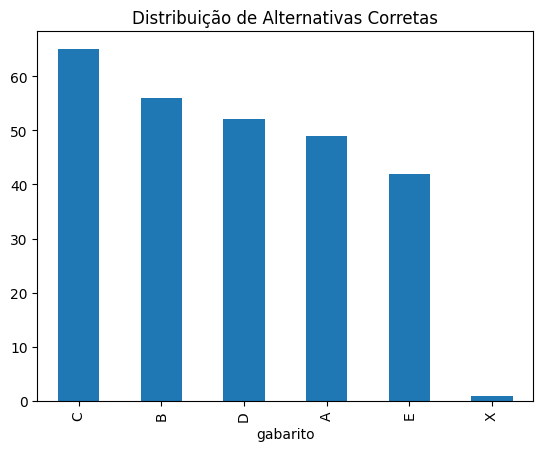

In [44]:
df['gabarito'].value_counts().plot(kind='bar', title='Distribuição de Alternativas Corretas')

# **Análise enunciados**

Text(0.5, 1.0, 'Distribuição do Tamanho dos Enunciados')

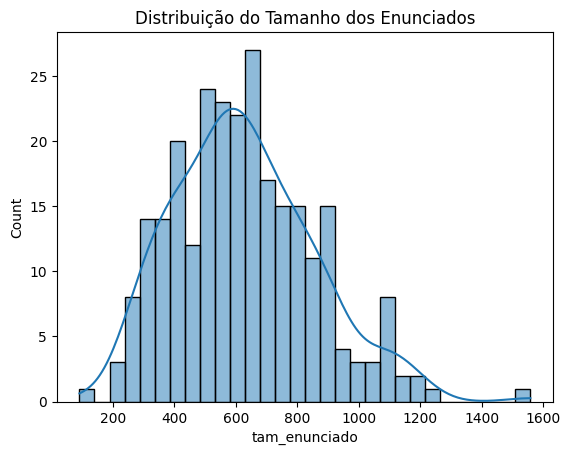

In [47]:
df['tam_enunciado'] = df['enunciado'].str.len()
sns.histplot(df['tam_enunciado'], bins=30, kde=True)
plt.title('Distribuição do Tamanho dos Enunciados')

Text(0.5, 1.0, 'Tamanho do Enunciado vs Dificuldade')

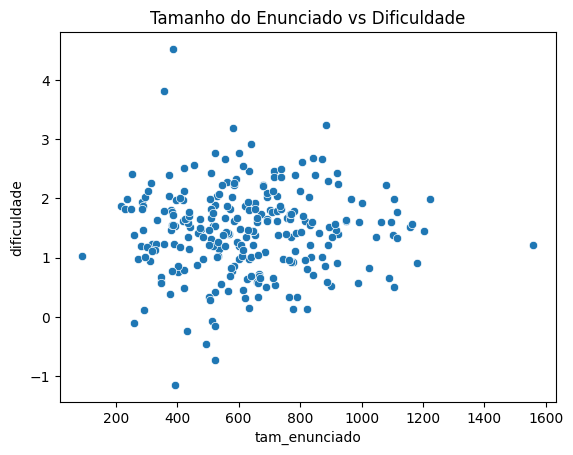

In [48]:
sns.scatterplot(x='tam_enunciado', y='dificuldade', data=df)
plt.title('Tamanho do Enunciado vs Dificuldade')